In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime



In [3]:
data = pd.read_csv("./new_york_city.csv")

#data preparation
data.columns = data.columns.str.replace(" ", "_")
data.columns = map(str.lower, data.columns)

#convert string of date to object
startdatelist = list(data.start_time)
startdates = [datetime.datetime.strptime(date.split()[0], "%Y-%m-%d") for date in startdatelist]
data['start_time'] = np.array(startdates)

#convert string of date to object
enddatelist = list(data.end_time)
enddates = [datetime.datetime.strptime(date.split()[0], "%Y-%m-%d") for date in enddatelist]
data['end_time'] = np.array(enddates)


In [4]:
#create month based on the start of trip
startdatelist = list(data.start_time)
startmonthdates = [date.month for date in startdatelist]
data['monthstart'] = np.array(startmonthdates)

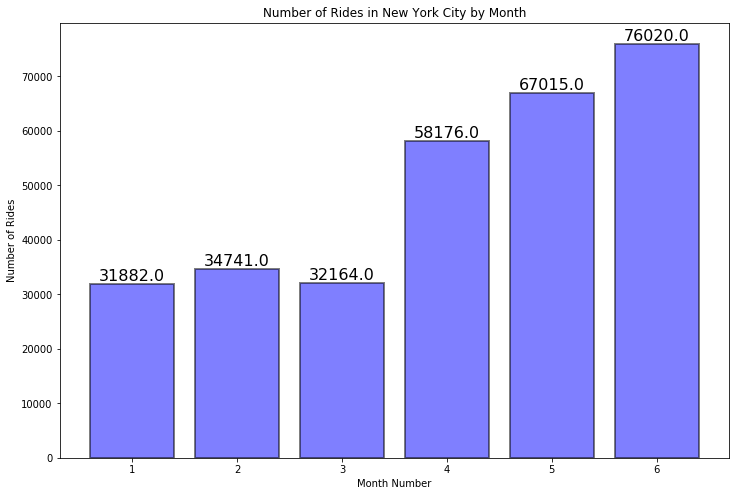

In [54]:
#number of rides for each month
plt.figure(figsize=(12, 8))
arr = plt.hist(data['monthstart'], bins = range(1,8), facecolor='blue', alpha=0.5, rwidth = 0.8, edgecolor='black', align="left", linewidth=2.0)
plt.xlabel('Month Number')
plt.ylabel('Number of Rides')
plt.title('Number of Rides in New York City by Month')
for i in range(6):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]),horizontalalignment='center', verticalalignment='bottom', fontsize = 16)
    
    

Female Rides Total Count: 66783
Male Rides Total Count: 204006


Text(0.5,0,'Number of Rides')

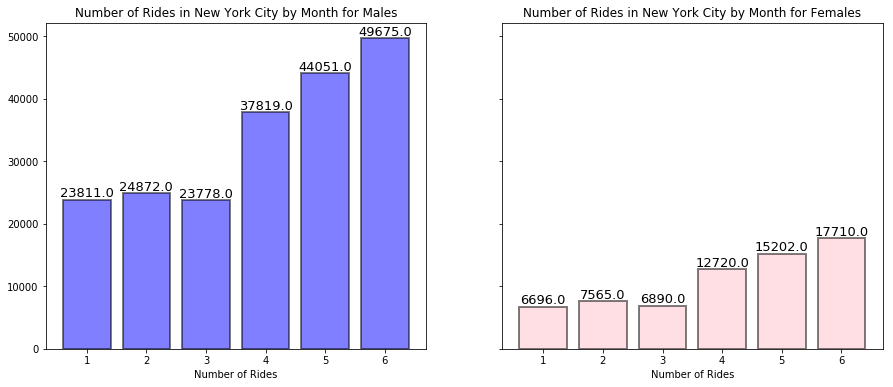

In [59]:
females = data[data.gender == 'Female']
males = data[data.gender == 'Male']
# a lot less females than males use bike sharing. Females: 
print("Female Rides Total Count: " + str(len(females)))
print("Male Rides Total Count: " + str(len(males)))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))

#histogram for male rides
arr1 = ax1.hist(males['monthstart'], bins = range(1,8), facecolor='blue', alpha=0.5, rwidth = 0.8, edgecolor='black', align="left", linewidth=2.0)
for i in range(6):
    ax1.text(arr1[1][i],arr1[0][i],str(arr1[0][i]),horizontalalignment='center', verticalalignment='bottom', fontsize = 13)
ax1.set_title('Number of Rides in New York City by Month for Males')
ax1.set_xlabel('Month Number')
ax1.set_xlabel('Number of Rides')

# histogram for female rides
arr2 = ax2.hist(females['monthstart'], bins = range(1,8), facecolor='pink', alpha=0.5, rwidth = 0.8, edgecolor='black', align="left", linewidth=2.0)
for i in range(6):
    ax2.text(arr2[1][i],arr2[0][i],str(arr2[0][i]),horizontalalignment='center', verticalalignment='bottom', fontsize = 13)
ax2.set_title('Number of Rides in New York City by Month for Females')
ax2.set_xlabel('Month Number')
ax2.set_xlabel('Number of Rides')

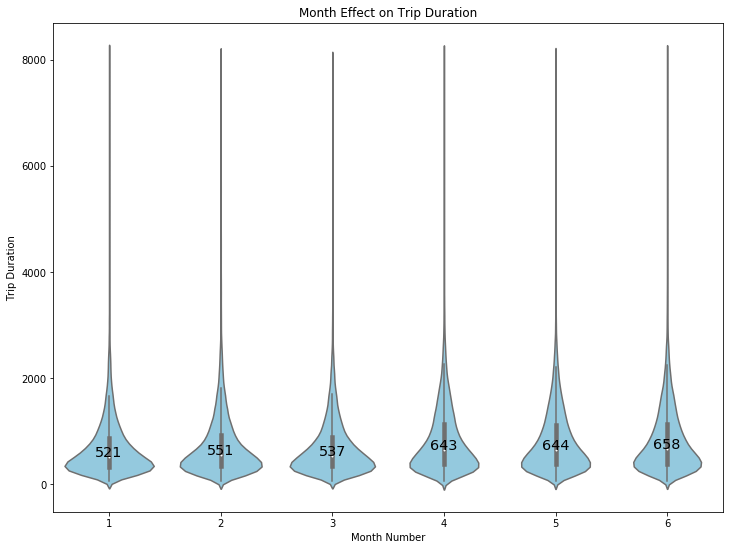

In [67]:
#remove outliers 2 standard deviations away from the mean to show violin plots better
arr = data['trip_duration']
mean = np.mean(data['trip_duration'], axis=0)
sd = np.std(data['trip_duration'], axis=0)
filtered_data = data[data.trip_duration > mean - 2 * sd]
filtered_data = data[data.trip_duration < mean + 2 * sd]


plt.subplots(figsize=(12,9))
ax = sns.violinplot(x="monthstart", y="trip_duration", data= filtered_data,color="skyblue")
ax.set_title('Month Effect on Trip Duration')
ax.set_xlabel('Month Number')
ax.set_ylabel('Trip Duration')

medians = filtered_data.groupby(['monthstart'])['trip_duration'].median().values
median_labels = [str(s) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 10, median_labels[tick], 
            horizontalalignment='center', verticalalignment='baseline', size='x-large', family = 'sans-serif', color='black')

[494 513 510 558 573 585]
[577 605 577 674 679 700]


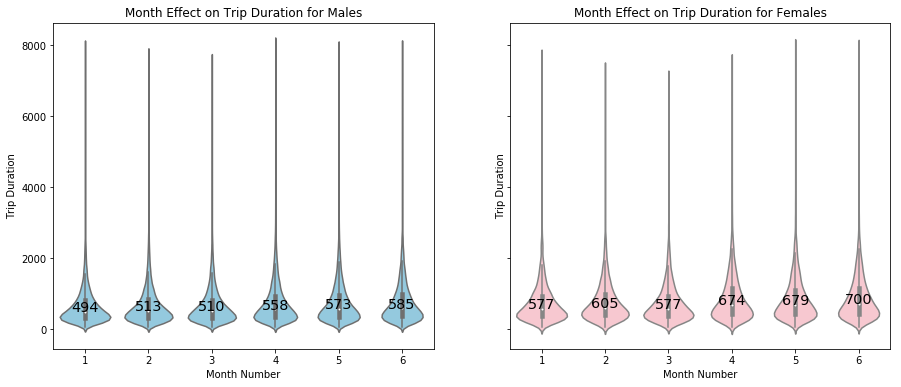

In [74]:
viofemales = filtered_data[filtered_data.gender == 'Female']
viomales = filtered_data[filtered_data.gender == 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))    

#histogram for male rides
ax1 = sns.violinplot(x="monthstart", y="trip_duration", data= viomales,color="skyblue", ax = ax1)
ax1.set_title('Month Effect on Trip Duration for Males')
ax1.set_xlabel('Month Number')
ax1.set_ylabel('Trip Duration')

medians = viomales.groupby(['monthstart'])['trip_duration'].median().values
print(medians)
median_labels = [str(s) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax1.get_xticklabels()):
    ax1.text(pos[tick], medians[tick] + 10, median_labels[tick], 
            horizontalalignment='center', verticalalignment='baseline', size='x-large', family = 'sans-serif', color='black')

# histogram for female rides
ax2 = sns.violinplot(x="monthstart", y="trip_duration", data= viofemales,color="pink", ax = ax2)
ax2.set_title('Month Effect on Trip Duration for Females')
ax2.set_xlabel('Month Number')
ax2.set_ylabel('Trip Duration')

medians = viofemales.groupby(['monthstart'])['trip_duration'].median().values
print(medians)
median_labels = [str(s) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax2.get_xticklabels()):
    ax2.text(pos[tick], medians[tick] + 10, median_labels[tick], 
            horizontalalignment='center', verticalalignment='baseline', size='x-large', family = 'sans-serif', color='black')